# K-Means Clustering

This is an unsupervised clustering algorithm that assigns points to a centroid. This is a quick way of grouping data points together and to identify outliers. The downside of this algorithm is that it takes up a lot of memory as everything has to be loaded in. However, it is very easy to implement and has many use cases

Import the libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scienceplots

from IPython.display import Image
from celluloid import Camera

np.random.seed(0)
plt.style.use(["science", "no-latex"])

## Example Dataset

Let's generate a dataset of random points

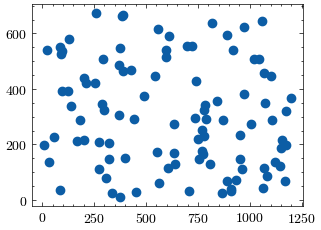

In [2]:
K = 12
w = 1200
h = 675
nums = 100

colors = np.random.rand(K, 3)

x = np.random.randint(0, w, size=nums)
y = np.random.randint(0, h, size=nums)
pts = np.column_stack((x, y))

# plot the points
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y)

## Distance Functions

When assigning points to centroids, we assign them to the closest centroid. In order to quantify this, we need to state how we measure distance. The following are 2 examples of distance functions.

Given point $p1$ at $(x_1, y_1)$ and point $p2$ at $(x_2, y_2)$, we can develop the following distance functions

Euclidean Distance: $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

Manhattan Distance: $|x_2-x_1| + |y_2-y_1|$

In [3]:
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

## K Means Setup

At the beginning, the centroids are initialized with random x and y values. 

In [4]:
centroids_x = np.random.randint(0, w, size=K)
centroids_y = np.random.randint(0, h, size=K)
centroids = np.column_stack((centroids_x, centroids_y))

## Graphing Functions

Create a helper function to create a plot with the sum of the distances squared on the left and the centroids on the right. Also initialize variables for the visualization, like the sum of the distances so far.

In [5]:
def create_plots():
    fig, ax = plt.subplots(1, 3, figsize=(16 / 9.0 * 4, 4 * 1), layout="constrained")
    fig.suptitle("K-Means Clustering Unsupervised")

    ax[0].set_xlabel("K Clusters", fontweight="normal")
    ax[0].set_ylabel("Sum of Euclidean Distance Squared", fontweight="normal")
    ax[0].set_title("Elbow Method")

    ax[1].axis("off")
    ax[2].axis("off")

    ax[2] = fig.add_subplot(1, 2, 2)
    ax[2].set_xlabel("X")
    ax[2].set_ylabel("Y")
    ax[2].set_title("Centroids")

    camera = Camera(fig)
    return ax[0], ax[2], camera

boundary_div = 25
x_boundary_inc = int(w / boundary_div)
y_boundary_inc = int(h / boundary_div)

x_boundary = np.linspace(0, w, x_boundary_inc + 1)
y_boundary = np.linspace(0, h, y_boundary_inc + 1)
x_boundary, y_boundary = np.meshgrid(x_boundary, y_boundary)
colors_idx_boundary = np.random.randint(0, K, size=x_boundary.shape)

x_boundary_flat = x_boundary.flatten()
y_boundary_flat = y_boundary.flatten()

dists = np.zeros(K)
dists_idx = np.arange(1, K + 1)

## Training the Model

Let's bring everything together. In this visualization, I show the centroids with varying values of K, which is the total number of centroids. For every value of K, I run the algorithm for a certain number of epochs. At the start, centroids start at a random location on the grid. In each epoch, points are assigned to the closest centroid. Then, the next location of the centroid is the average x and y value of all the points assigned to it in the previoius iteration.

In [6]:
ax0, ax1, camera = create_plots()
epochs = 8

output_filename = "k_means.gif"

for k in range(1, K + 1):
    acc_dist_squared = 0
    for e in range(epochs):
        # Draw the boundaries
        for index in np.ndindex(x_boundary.shape):
            x = x_boundary[index]
            y = y_boundary[index]

            colors_idx_boundary[index] = 0
            min_group = 0
            # set min distance to largest possible distance initially
            min_dist = np.sqrt(w**2 + h**2)

            curr_pt = [x, y]
            curr_c = []
            for c in range(k):
                curr_c = centroids[c]

                dist = euclidean_distance(curr_pt, curr_c)
                if dist < min_dist:
                    min_dist = dist
                    min_group = c
            colors_idx_boundary[index] = min_group

        colors_boundary = colors[colors_idx_boundary.flatten()]
        ax1.scatter(
            x_boundary_flat, y_boundary_flat, c=colors_boundary, s=20, alpha=0.45
        )

        # Assign each point to a centroid
        groups = [[] for _ in range(k)]
        acc_dist_squared = 0
        for i in range(nums):
            min_group = 0
            # set min distance to largest possible distance initially
            min_dist = np.sqrt(w**2 + h**2)

            curr_pt = pts[i]
            curr_c = []
            for c in range(k):
                curr_c = centroids[c]

                dist = euclidean_distance(curr_pt, curr_c)
                if dist < min_dist:
                    min_dist = dist
                    min_group = c

            groups[min_group].append(curr_pt)
            acc_dist_squared += min_dist**2

        # Centroids
        for g in range(k):
            # Draw the centroids
            curr_centroid = centroids[g]
            curr_centroid = np.array([curr_centroid], dtype=np.int32)
            ax1.scatter(curr_centroid[:, 0], curr_centroid[:, 1], color=colors[g], s=8)

            group_pts = np.array(groups[g])
            if group_pts.size != 0:
                # Draw lines between points and the centroids
                pts_in_group = group_pts.shape[0]
                for i in range(pts_in_group):
                    group_pt = group_pts[i]
                    ax1.plot(
                        [group_pt[0], centroids[g][0]],
                        [group_pt[1], centroids[g][1]],
                        color=colors[g],
                        linewidth=2,
                        alpha=0.55,
                    )

                # Update the location of the centroids
                new_centroid = np.mean(group_pts, axis=0)
                centroids[g] = new_centroid
                new_centroid = np.array([new_centroid], dtype=np.int32)

        # Draw the points
        ax1.scatter(pts[:, 0], pts[:, 1], c="black", s=15, alpha=0.3)
        # Draw the Elbow Method graph
        if k - 2 > 0:
            ax0.plot(dists_idx[: k - 1], dists[: k - 1], color="red")
        camera.snap()
        # if e % 2 == 0:
        #     camera.snap()
        # else:
        #     ax0.clear()
        #     ax1.clear()

    acc_dist_squared /= nums
    dists[k - 1] = acc_dist_squared
    print(k-1, acc_dist_squared)

animation = camera.animate()
animation.save("k_means.gif", writer="pillow")
plt.close()

0 158627.63
1 62379.95
2 47984.72
3 40085.6
4 28638.72
5 24290.07
6 20755.56
7 15453.13
8 12900.14
9 12373.94
10 12023.81
11 11002.26


In [7]:
Image(url=output_filename)